# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

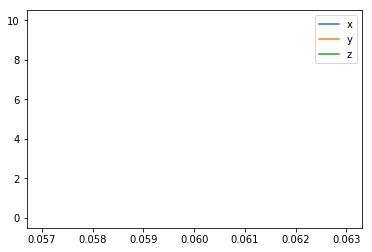

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

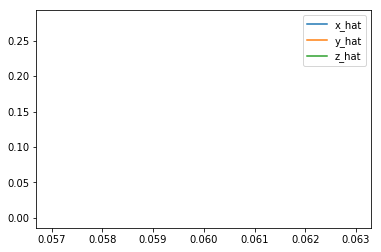

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

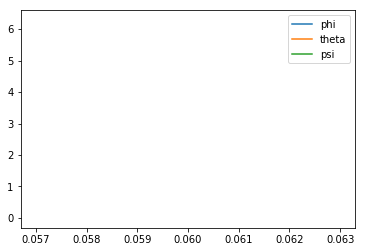

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

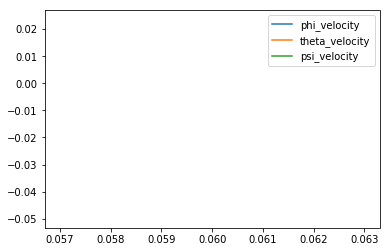

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

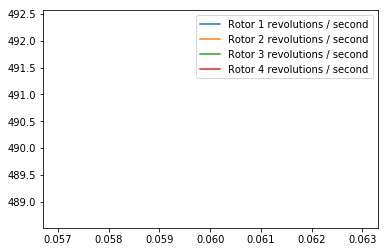

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -3.55116072e-07  -6.08494595e-08   1.00044047e+01   6.28309668e+00
   3.07690428e-04   0.00000000e+00]
[ -3.03262807e-05  -6.66341211e-06   1.46815011e-01]
[-0.00460881  0.01379838  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  15.299 (best =  15.300), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [20]:
## TODO: Train your agent here.

from task import Task
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Setting up the task
# The task is to go from initial position to a target position. Initial 
# velocity and angular velocity are assumed to be zero. 
init_pose = np.array([7., 5., 10., 0.01, 0.01, 0.01])
target_pos = np.array([5., 3., 12.])
runtime = 5   # Making sure the agent has enough time to run the episode
task = Task(init_pose = init_pose, target_pos = target_pos, runtime = runtime)


In [21]:
# Setting up min max scalars for scaling states and actions to use in Neural Networks
from sklearn.preprocessing import MinMaxScaler

states_range = [[-5], [15]]
action_range = [[task.action_low], [task.action_high]]

def get_scaler(val_range, text):
    scaler = MinMaxScaler()
    scaler.fit(val_range)
    print('\nScaler for ', text)
    print('Min value: ', scaler.data_min_)
    print('Max value: ', scaler.data_max_)
    return scaler

states_scaler = get_scaler(states_range, 'states')
actions_scaler = get_scaler(action_range, 'actions')



Scaler for  states
Min value:  [-5.]
Max value:  [ 15.]

Scaler for  actions
Min value:  [ 0.]
Max value:  [ 900.]


In [22]:
# Setting parameters and creating objects

num_episodes = 2000

# Algorithm parameters
gamma = 0.99
tau = 0.01

# Replay Buffer parameters
buffer_size = 100000
batch_size = 64

# Ornstein - Uhlenbeck Noise parameters
noise_mu = 0.0
noise_theta = 0.15
noise_sigma = 0.2*20

# Actor Neural Net parameters
actor_learning_rate = 0.001
actor_num_hidden_units = [128, 512, 128]
actor_dropout_rate = 0.1

# Critic Neural Net parameters - parameters are some for states and actions layers
critic_learning_rate = 0.001
critic_num_hidden_units = [64, 128]
critic_dropout_rate = 0.1

from agents.agent import DDPG

agent = DDPG(task, gamma = gamma, tau = tau, buffer_size = buffer_size, batch_size = batch_size, 
             noise_mu = noise_mu, noise_theta = noise_theta, noise_sigma = noise_sigma,
            actor_learning_rate = actor_learning_rate, actor_num_hidden_units = actor_num_hidden_units, 
             actor_dropout_rate = actor_dropout_rate, critic_learning_rate = critic_learning_rate, 
             critic_num_hidden_units = critic_num_hidden_units, critic_dropout_rate = critic_dropout_rate,
            states_scaler = states_scaler, actions_scaler = actions_scaler)



Actor Local Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 18)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               2432      
_________________________________________________________________
batch_normalization_29 (Batc (None, 128)               512       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               66048     
_________________________________________________________________
batch_normalization_30 (Batc (None, 512)               20

In [23]:
# Training Algo

total_rewards = []
episode_print_step = 5

x = []
y = []
z = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode()
    #print('Initial State: ', state)
    episode_reward = 0
    x_sub = []
    y_sub = []
    z_sub = []
    while True:
        #print('Episode: ', str(i_episode))
        #print('State: ', state)
        st_store = states_scaler.inverse_transform([state])[0]
        x_sub.append(st_store[0])
        y_sub.append(st_store[1])
        z_sub.append(st_store[2])
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        episode_reward += reward
        agent.step(action, reward, next_state, done)
        
        state = states_scaler.transform([next_state])[0]
        #print('Next State: ', next_state)
        if done:
            break
    total_rewards.append(episode_reward)
    x.append(x_sub)
    y.append(y_sub)
    z.append(z_sub)
    
    if (i_episode) % episode_print_step == 0:
        print ('Episode: {:5d}, Score: {:7.3f}, Best Score: {:7.3f}, Critic Loss: {:2.4f}'
               .format( i_episode, episode_reward, max(total_rewards), agent.critic_loss))
    

Episode:     5, Score:   0.581, Best Score:   8.872, Critic Loss: 0.0528
Episode:    10, Score:   0.766, Best Score:   8.872, Critic Loss: 0.0167
Episode:    15, Score:   1.556, Best Score:   8.872, Critic Loss: 0.0111
Episode:    20, Score:   0.486, Best Score:   8.872, Critic Loss: 0.0097
Episode:    25, Score:   0.507, Best Score:   8.872, Critic Loss: 0.0127
Episode:    30, Score:   1.306, Best Score:   8.872, Critic Loss: 0.0070
Episode:    35, Score:   3.146, Best Score:   8.872, Critic Loss: 0.0054
Episode:    40, Score:   3.605, Best Score:   8.872, Critic Loss: 0.0186
Episode:    45, Score:   1.399, Best Score:   8.872, Critic Loss: 0.0117
Episode:    50, Score:   4.634, Best Score:   8.872, Critic Loss: 0.0310
Episode:    55, Score:   0.426, Best Score:   8.872, Critic Loss: 0.0839
Episode:    60, Score:   4.209, Best Score:   8.872, Critic Loss: 0.0216
Episode:    65, Score:   3.363, Best Score:   8.872, Critic Loss: 0.0706
Episode:    70, Score:   2.145, Best Score:   8.872

In [24]:
avg_final_scores = np.mean(total_rewards[:-10])
print('Average scores over the last 10 episodes is: {:2.3f}'.format(avg_final_scores))

Average scores over the last 10 episodes is: 2.095


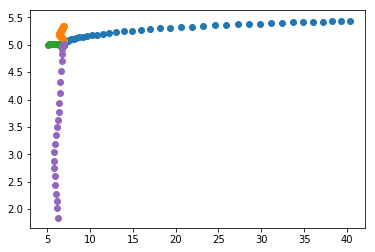

In [25]:
# plot paths
for i in range(300, 1500, 250):
    plt.scatter(x = x[i], y = y[i])
    #plt.show()


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.
plt.plot(total_rewards)
plt.xlabel(s = 'Episode')
plt.ylabel(s = 'Rewards')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I have decided to reach a target position from a given initial position. I have assumed that z = 0 is ground level and hitting this will mean a crash. I did several iterations of the reward function.
I initially started with the reward function in the file originally that calculated the absolute sum of the difference in simulated and target positions, scaled it and subtracted it from a scalar value (1.0). I soon abandoned this as it was possible for the agent to move away from the target (radial distance, measured as square root of x^2 + y^2 + z^2) but still have no change in reward. For example, x and y could each change by 0.5 but z could change by 1.

I decided to change the reward to the radial distance from the target, calculated as -0.02 * radial distance. Here I realised that reward was always negative and so the agent wouldn't generalize.

I then changed it to 0.02 * exp(-radial distance). This incentivizes the agent with greater positive reward for reducing the radial distance but I didn't see much difference in the convergence of the learning algorithm and so removed this replacing with a different reward. 

I decided to go back to the basics and realised that the key think I want is for the agent to go from initial to target position in a straight line and as fast as possible. To achieve this, I create a distance vector to represent target position minus simulated position (x, y and z only). I calculate the cosine value of the angle between the distance vector and simulated velocity vector. The cosine value is 1 when the two vectors are parallel, which is the desired behaviour. The value is 0 when the vectors are orthogonal and it is -1 if the vectors are in opposite direction. Cosine is a non linear function and cosine of 45 degrees is 0.7 and so this offers a nice high value from smaller angles. This is a simple metric and the reward has 2 elements - scalar multiplied by the cosine value and scalar multiplied by max of cosine value and 0.5. This latter term is to give an extra reward for having the right direction. 

I then added a penalty for a crash by checking if the current z position in the simulated position vector was less than 0. Later I changed this realising that due to the action_repeat loop, it was possible to penalise multiple times. The penalty is now paid when the previous z postion is greater than or equal to zero but goes below zero in the simulated vector. I also force the episode to end by changing done to True. 

I have added a big positive reward for getting within a 0.5 radial distance of the target. I also force the episode to end.

So in the end, I have 3 reward terms - the cosine value (for each step), the reward for reaching target and the penalty in case of crash.





**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I have implemented the DDPG Agent using the notes provided in the Project details. This is implemented in the agent.py file. I have implemented 5 classes - agent, actor, critic, replay_memory and the noise. I have also printed the model summary for the actor's and critic's local and target neural nets.

The rewards are linked to the simulated positions (x, y and z) and the velocity vector along x, y and z. Hence, I have modified the state in task.py to be [x, y, z, velocity_x, velocity_y, velocity_z] for each simulation.

The description of the 5 classes in agent.py file are:

Agent - The hyperparameters used are:

gamma = 0.99

tau = 0.05

I have made some changes to the code given in the notes. All the hyperparameters are provided as the input to the initialisation of the Agent class. They hyperparameters can be changed through this notebook. The agent, apart from the task (environment), is the only class whose object is created in the notebook. The Agent class interacts with the other 4 classes through initialising the class objects, to building models and running training. The learning algorithm to manage the flow of data and gradients between actor and critic models, along with their local and target models, is managed within the step() function of the Agent class. I haved added floor and cap to the action value in act() to account for very high or very low values due to noise. I have also created a noise_sample for debugging the noise values.

Actor - This class has the model design to build the neural nets for actor's local and target models. The hyperparameters are:

Learning Rate = 0.005

DropOut Rate = 0.1

I also provided a list with the number of nodes in the hidden layers - [32,64,32]. This is used to easily change the number of hidden layers as well as the number of nodes in each respective layer from the notebook. I have added Dropout layers and Batch Normalization layers. I have added Batch Normalization to the input layer too as these values have not been preprocessed to fit a particular range and the actual state values can conceptually change significantly. I have used Leaky ReLU as the activation function for the hidden layers with alpha = 0.1. I see the feedback method between the actor and critic in the DDPG architecture as intuitively similar to the Generative Adversarial Models. Using that intuition, I think it is better to use Leaky ReLU to train the model. I have used the tanh activation layer for the output (raw_actions), in line with the DDPG paper and changed the formula for calculating actions. 

Critic - This class has the model design to build the neural nets for critic's local and target models. The hyperparameters are:

Learning Rate = 0.005

DropOut Rate = 0.1

I also provided a list with the number of nodes in the hidden layers - [32,64], just like the Actor network. I have added Dropout layers and Batch Normalization layers and created a new function to create the nets needed for states and actions. I have used the Duel Network architecture in line with the DDPG paper (and code with the Project). I have used ReLU activation layer for the hidden layers and no activation function for the output (Q-Value). Similar to the Actor model, I have Batch Normalization to the input layers as well.

Replay Memory - This class builds a fixed size buffer to store experience tuples. It also provides functions to add experiences and get a sample of experiences. The hyperparameters are:

buffer_size = 100000

batch_size = 64


Noise - This is the Ornstein - Uhlenbeck process implementation to add noise to the actions generated by the actor's local model. This noise is useful for exploration to find better policies. The hyperparameters are:

noise_mu = 0.0

noise_theta = 0.15

noise_sigma = 0.2 * 5

I decided to have a high sigma as the noise is added to the actions that have a pretty big range from 0 to 900. 

I tried the architecture with and without Batch Normalization and Dropout layers. I didn't notice major changes to the result from the Dropout layers.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
Once I had read through the paper on DDPG, I was able to follow the theory behind the learning algorithm. I have found the learning process to be very difficult in practice. I have played around with numerous combination of parameters with some success. I have tried very large values for noise through theta and sigma parameters and though, it does help in achieving some very high positive value rewards, it makes the whole learning processing very unstable. I have tried different values for the actor and critic learning rates (0.1 to 0.0001), gamma (0.8 to 0.99) and tau(0.1 to 0.001). I added a scaling factor, 0.95, to the action values in order to avoid the maximum and minimum allowed values of the actions in order to improve learning. I also tried adding a minimum of 10 times the batch size amount of experiences to the replay buffer before I start learning so that there are more samples to choose from. I tried different batch sizes of 128, 256 and 512 but the performance was the same. Changing the number of hidden layers to add one more or increasing the number of units in hidden layer to 2-5 times the current number of units, also did not improve the performance. I switched the activation functions from ReLU to Leaky ReLU and the sigmoid to tanh. Finally I also played with the DropOut alpha (0.1 to 0.3) and changing the number of Batch Normalization layers. I also added Batch Normalization layers to the input layers for actor and critic models as both states and actions values are not preprocessed to fit a defined range of [0,1] or [-1,1] and can move significantly. However, during debugging I found that, despite all attempts, the actor local model would not provide high rotor speed to all 4 rotors even when the z position value was going down (the target position has a higher z position value). In fact, in most of the experiences I observed in debugging, I found that the rotor speed was either almost maximum or the minimum value of the action range. The agent as a result consistent moves down (z position value keeps reducing). This gives a negative reward as the direction of velocity and the direction of travel needed are more than 90 degrees apart. I have found it hard to understand why the model would behave this way and why the learning process wouldn't train the agent to increase the action for all 4 rotors. How do I force the agent to create such experiences? I have tried searching on the Student Hub and Knowledge Hub but couldn't get any help for this problem. 

Another drawback of the above issue is that since the agent is not able to move in the right direction, it doesn't get close enough to the target position to earn the big positive reward and develop experiences for this. This really exposes the problem of how to train the agent for states it hasn't experienced.

I found my main breakthrough moments as I improved on the rewards calculation. The scores became more stable with each attempt and the best scores also improved significantly. In my last iteration, the average rewards over the last 10 episodes was -2.866. I would expect the rewards to be much higher with a well trained agent.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
Getting started was particularly hard as I had no prior practical experience of creating such an agent. I spent a lot of time understanding the DDPG paper and also read through some answers to questions on the Knowledge Hub. There are a few links  to StackOverflow, provided on Knowledge Hub (https://knowledge.udacity.com/questions/32745) to help understand the theory. 
I have found training the agent to be the hardest part. I have tried numerous combinations of the hyperparameters and architectural changes as detailed in Answer 3 but still could not see much improvement in the total rewards. 

I noticed that the agent was particularly sensitive to the reward function. The values and the calculation method had to be refined so as to avoid big swings in rewards and also keep it simple. I found this part of the exercise to be very interesting.

I have some ideas for further improvement. The current implementation provides the states to the agent and trains to reach close to a target position. This training is then specific to the initial position and the final position. Though the reward function mainly relies on the direction of travel to get rewards for individual simulation step, the weights of the neural network models for the actor and critic have been trained for the specific range of the states experienced during training. This is not suitable in practice as we would prefer to train the agent once and then be able to instruct the quadcopter to fly to any target position. There can also be addition of wind in the environment to make this more real-life. 